In [11]:
import polars as pl
import seaborn as sns
import polars.selectors as cs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(bodyfat := pl.read_csv('data/bodyfat.csv')
)

shape: (252, 15)
┌─────────┬─────────┬─────┬────────┬───┬───────┬────────┬─────────┬───────┐
│ density ┆ bodyfat ┆ age ┆ weight ┆ … ┆ ankle ┆ biceps ┆ forearm ┆ wrist │
│ ---     ┆ ---     ┆ --- ┆ ---    ┆   ┆ ---   ┆ ---    ┆ ---     ┆ ---   │
│ f64     ┆ f64     ┆ i64 ┆ f64    ┆   ┆ f64   ┆ f64    ┆ f64     ┆ f64   │
╞═════════╪═════════╪═════╪════════╪═══╪═══════╪════════╪═════════╪═══════╡
│ 1.0708  ┆ 12.3    ┆ 23  ┆ 154.25 ┆ … ┆ 21.9  ┆ 32.0   ┆ 27.4    ┆ 17.1  │
│ 1.0853  ┆ 6.1     ┆ 22  ┆ 173.25 ┆ … ┆ 23.4  ┆ 30.5   ┆ 28.9    ┆ 18.2  │
│ 1.0414  ┆ 25.3    ┆ 22  ┆ 154.0  ┆ … ┆ 24.0  ┆ 28.8   ┆ 25.2    ┆ 16.6  │
│ 1.0751  ┆ 10.4    ┆ 26  ┆ 184.75 ┆ … ┆ 22.8  ┆ 32.4   ┆ 29.4    ┆ 18.2  │
│ 1.034   ┆ 28.7    ┆ 24  ┆ 184.25 ┆ … ┆ 24.0  ┆ 32.2   ┆ 27.7    ┆ 17.7  │
│ …       ┆ …       ┆ …   ┆ …      ┆ … ┆ …     ┆ …      ┆ …       ┆ …     │
│ 1.0736  ┆ 11.0    ┆ 70  ┆ 134.25 ┆ … ┆ 21.5  ┆ 25.6   ┆ 25.7    ┆ 18.5  │
│ 1.0236  ┆ 33.6    ┆ 72  ┆ 201.0  ┆ … ┆ 23.2  ┆ 35.2   ┆ 28.6    ┆ 20.1  │
│ 1.0328  ┆ 29.3    ┆ 72  ┆ 186.75 ┆ … ┆ 21.5  ┆ 31.3   ┆ 27.2    ┆ 18.0  │
│ 1.0399  ┆ 26.0    ┆ 72  ┆ 190.75 ┆ … ┆ 22.7  ┆ 30.5   ┆ 29.4    ┆ 19.8  │
│ 1.0271  ┆ 31.9    ┆ 74  ┆ 207.5  ┆ … ┆ 24.6  ┆ 33.7   ┆ 30.0    ┆ 20.9  │
└─────────┴─────────┴─────┴────────┴───┴───────┴────────┴─────────┴───────┘

In [3]:
bodyfat_unpivoted = bodyfat.unpivot(index='bodyfat', variable_name='predictor', value_name='label')
bodyfat_unpivoted

shape: (3_528, 3)
┌─────────┬───────────┬────────┐
│ bodyfat ┆ predictor ┆ label  │
│ ---     ┆ ---       ┆ ---    │
│ f64     ┆ str       ┆ f64    │
╞═════════╪═══════════╪════════╡
│ 12.3    ┆ density   ┆ 1.0708 │
│ 6.1     ┆ density   ┆ 1.0853 │
│ 25.3    ┆ density   ┆ 1.0414 │
│ 10.4    ┆ density   ┆ 1.0751 │
│ 28.7    ┆ density   ┆ 1.034  │
│ …       ┆ …         ┆ …      │
│ 11.0    ┆ wrist     ┆ 18.5   │
│ 33.6    ┆ wrist     ┆ 20.1   │
│ 29.3    ┆ wrist     ┆ 18.0   │
│ 26.0    ┆ wrist     ┆ 19.8   │
│ 31.9    ┆ wrist     ┆ 20.9   │
└─────────┴───────────┴────────┘

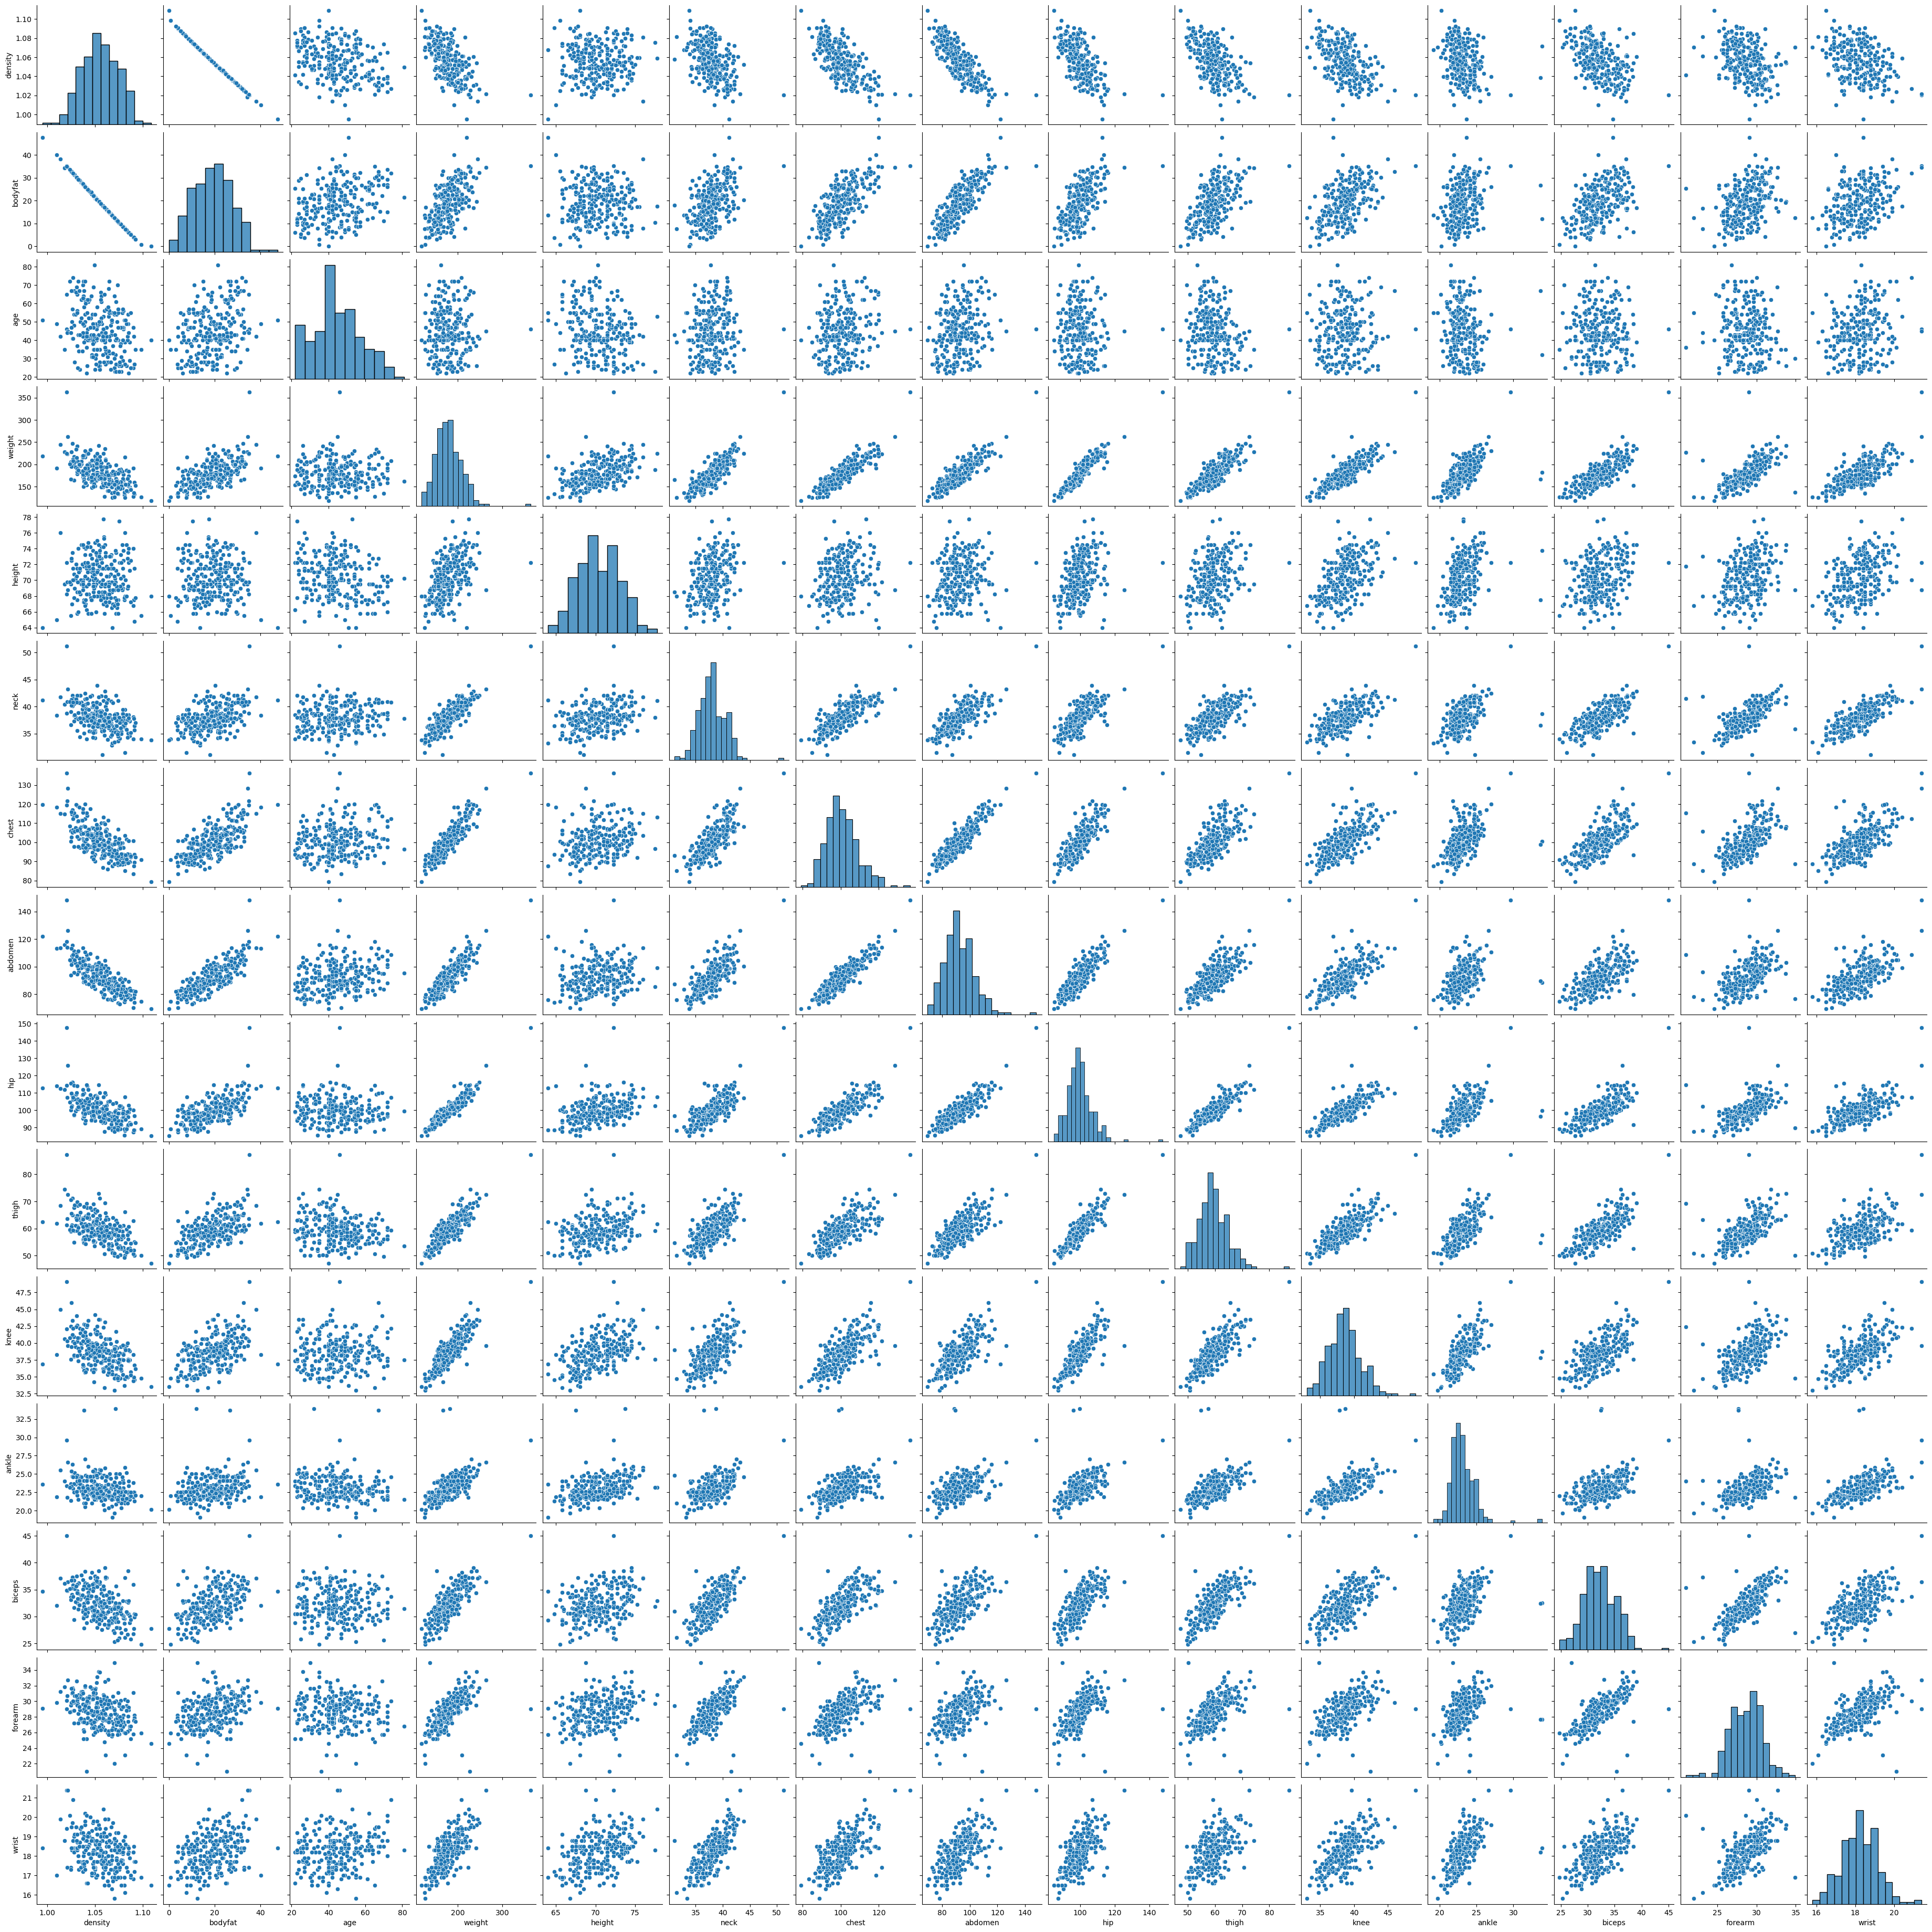

In [4]:
sns.pairplot(bodyfat.to_pandas())

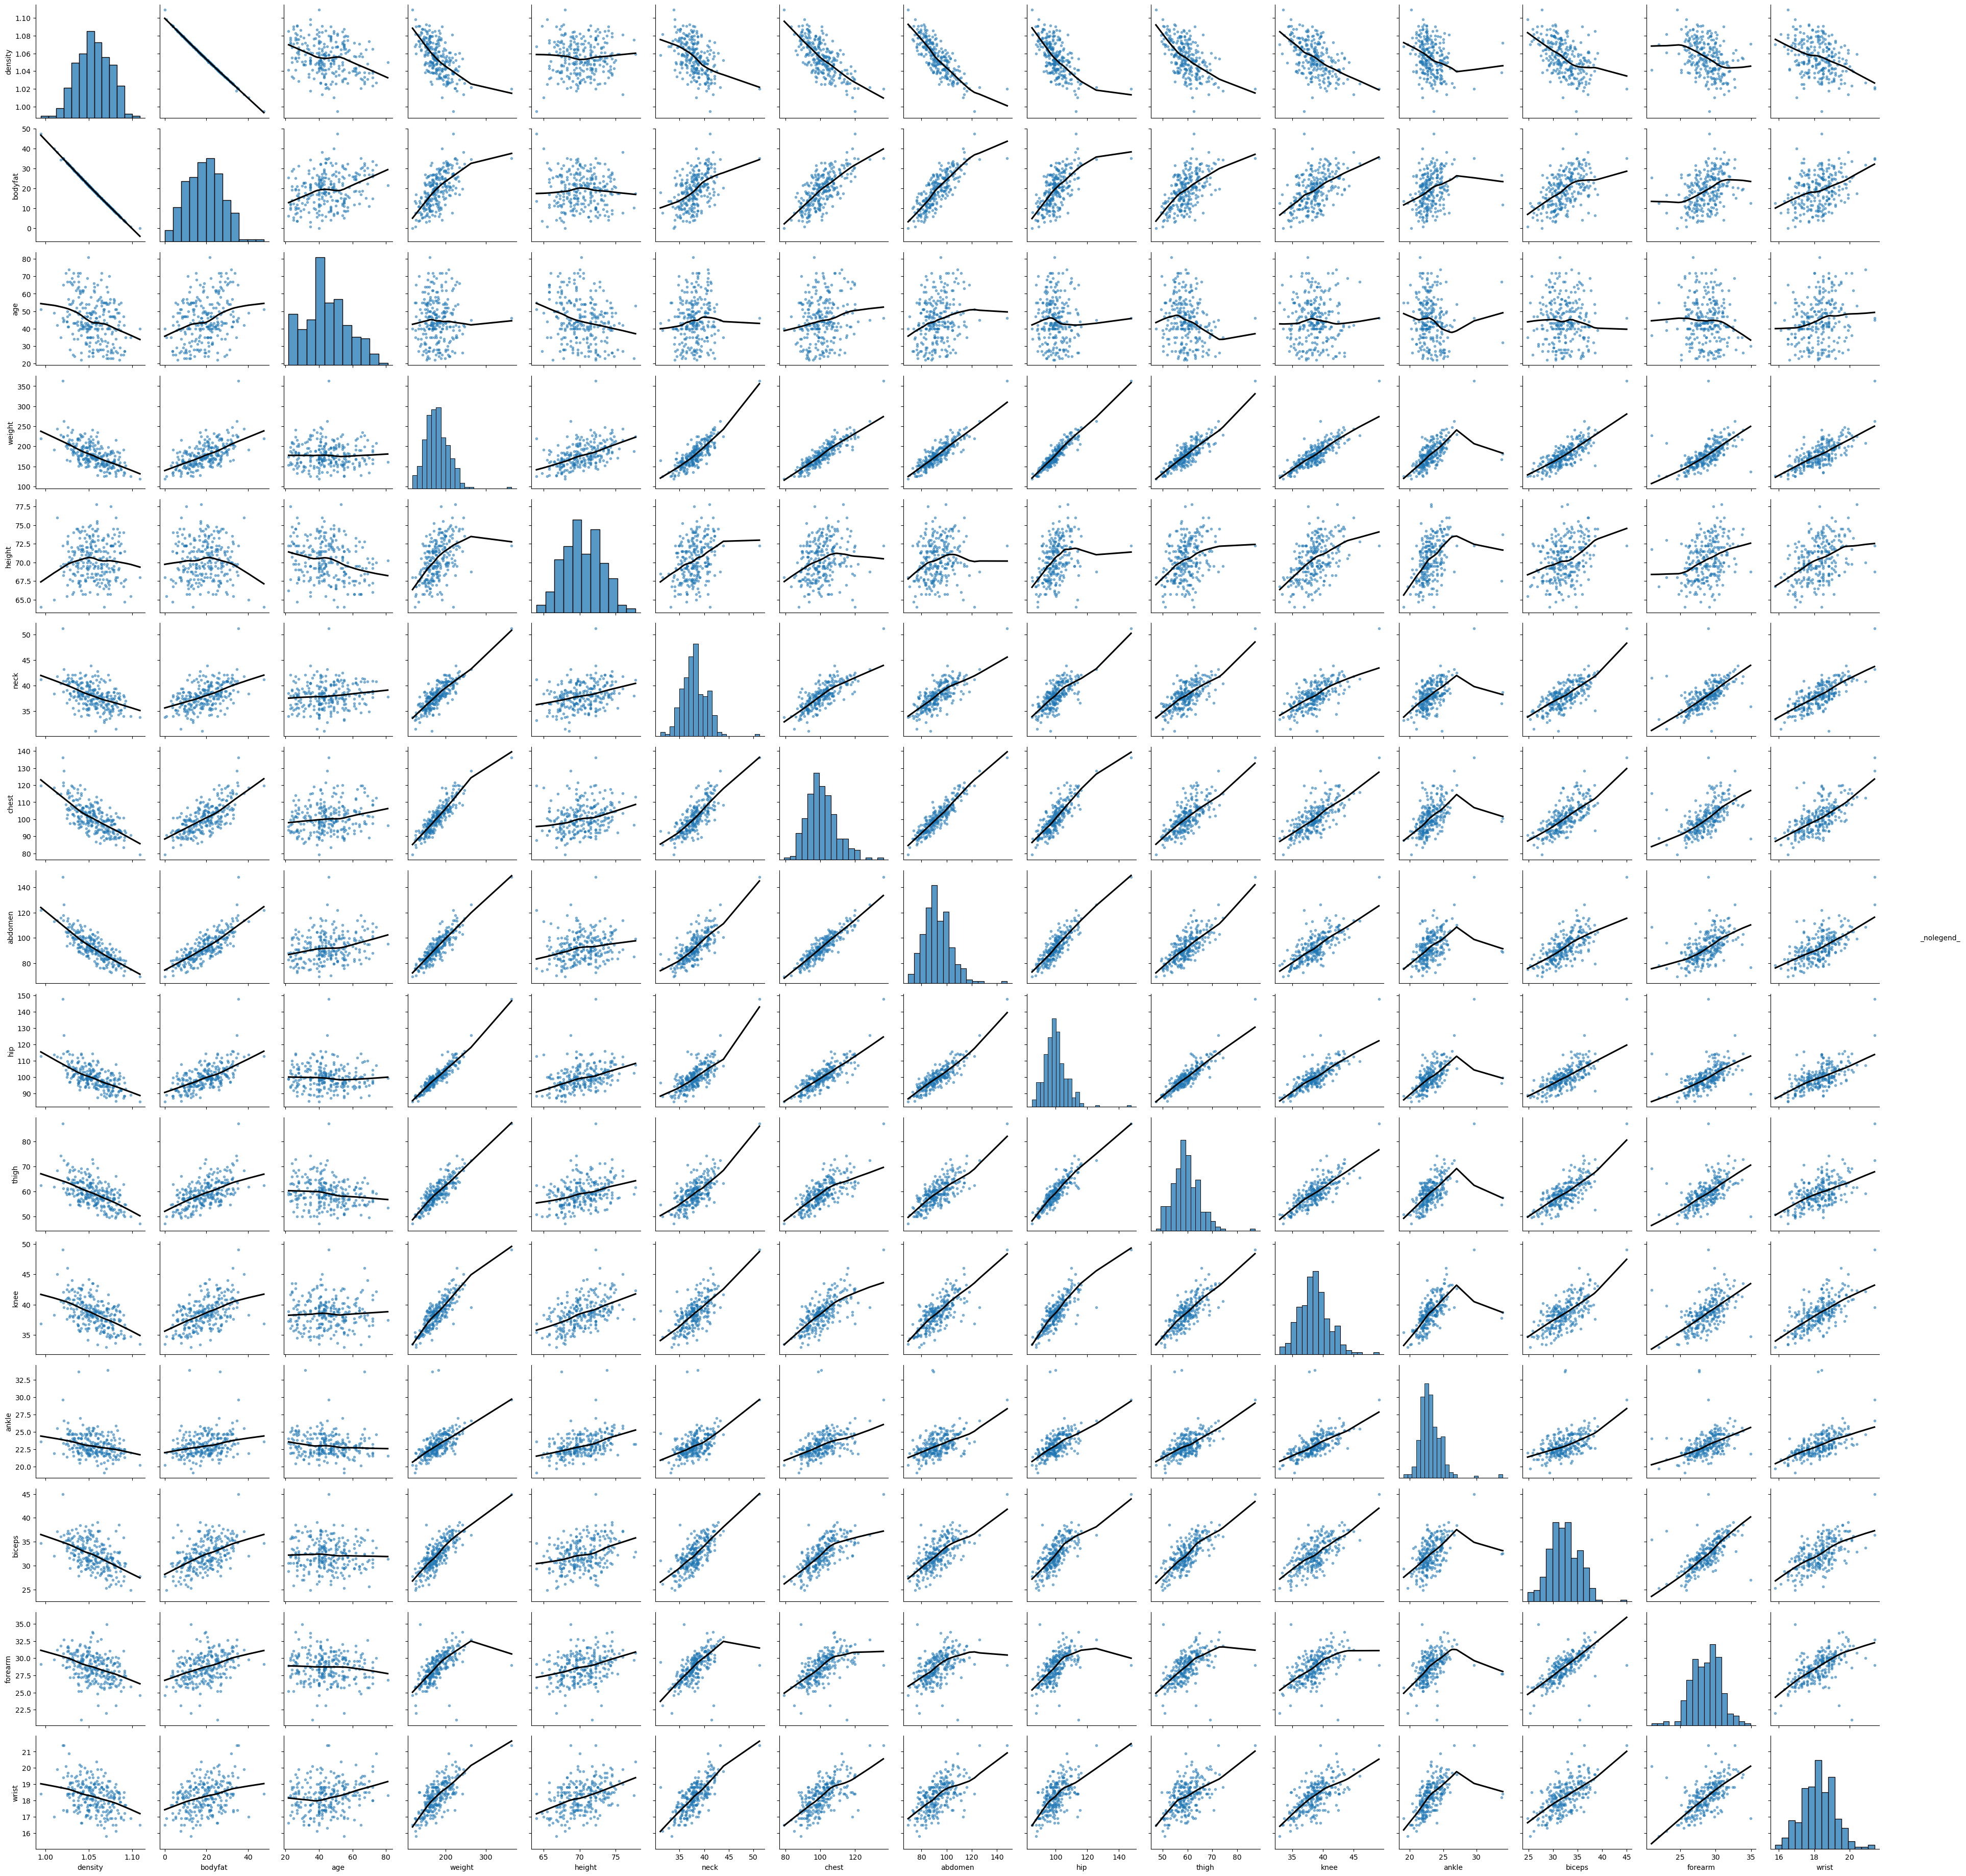

In [5]:
g = sns.PairGrid(bodyfat.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker=".",
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'black'}
              )
g.add_legend()

## **We realistically only want to see how body fat reacts to the different predictors, not how predictors react to predictors. From the data, we can see that variables such as hip, abdomen, and weight are all strongly positively correlated with the bodyfat variable, while other variables shouldn't be good predictors, such as height or ankle.**

# House prices in Saratoga, NY

In [8]:
(houses := pl.read_csv('data/Saratoga_NY_Homes.csv'))

shape: (1_728, 17)
┌────────┬──────────┬────────────┬─────┬───┬────────────┬───────────┬───────┬─────────────┐
│ Price  ┆ Lot.Size ┆ Waterfront ┆ Age ┆ … ┆ Fireplaces ┆ Bathrooms ┆ Rooms ┆ Fireplaces? │
│ ---    ┆ ---      ┆ ---        ┆ --- ┆   ┆ ---        ┆ ---       ┆ ---   ┆ ---         │
│ i64    ┆ f64      ┆ i64        ┆ i64 ┆   ┆ i64        ┆ f64       ┆ i64   ┆ i64         │
╞════════╪══════════╪════════════╪═════╪═══╪════════════╪═══════════╪═══════╪═════════════╡
│ 132500 ┆ 0.09     ┆ 0          ┆ 42  ┆ … ┆ 1          ┆ 1.0       ┆ 5     ┆ 1           │
│ 181115 ┆ 0.92     ┆ 0          ┆ 0   ┆ … ┆ 0          ┆ 2.5       ┆ 6     ┆ 0           │
│ 109000 ┆ 0.19     ┆ 0          ┆ 133 ┆ … ┆ 1          ┆ 1.0       ┆ 8     ┆ 1           │
│ 155000 ┆ 0.41     ┆ 0          ┆ 13  ┆ … ┆ 1          ┆ 1.5       ┆ 5     ┆ 1           │
│ 86060  ┆ 0.11     ┆ 0          ┆ 0   ┆ … ┆ 0          ┆ 1.0       ┆ 3     ┆ 0           │
│ …      ┆ …        ┆ …          ┆ …   ┆ … ┆ …          ┆ …         ┆ …     ┆ …           │
│ 289000 ┆ 0.38     ┆ 0          ┆ 32  ┆ … ┆ 1          ┆ 2.5       ┆ 11    ┆ 1           │
│ 285000 ┆ 0.94     ┆ 0          ┆ 37  ┆ … ┆ 1          ┆ 2.5       ┆ 11    ┆ 1           │
│ 194900 ┆ 0.39     ┆ 0          ┆ 9   ┆ … ┆ 0          ┆ 1.0       ┆ 3     ┆ 0           │
│ 125000 ┆ 0.24     ┆ 0          ┆ 48  ┆ … ┆ 1          ┆ 1.0       ┆ 7     ┆ 1           │
│ 111300 ┆ 0.59     ┆ 0          ┆ 86  ┆ … ┆ 0          ┆ 1.0       ┆ 6     ┆ 0           │
└────────┴──────────┴────────────┴─────┴───┴────────────┴───────────┴───────┴─────────────┘

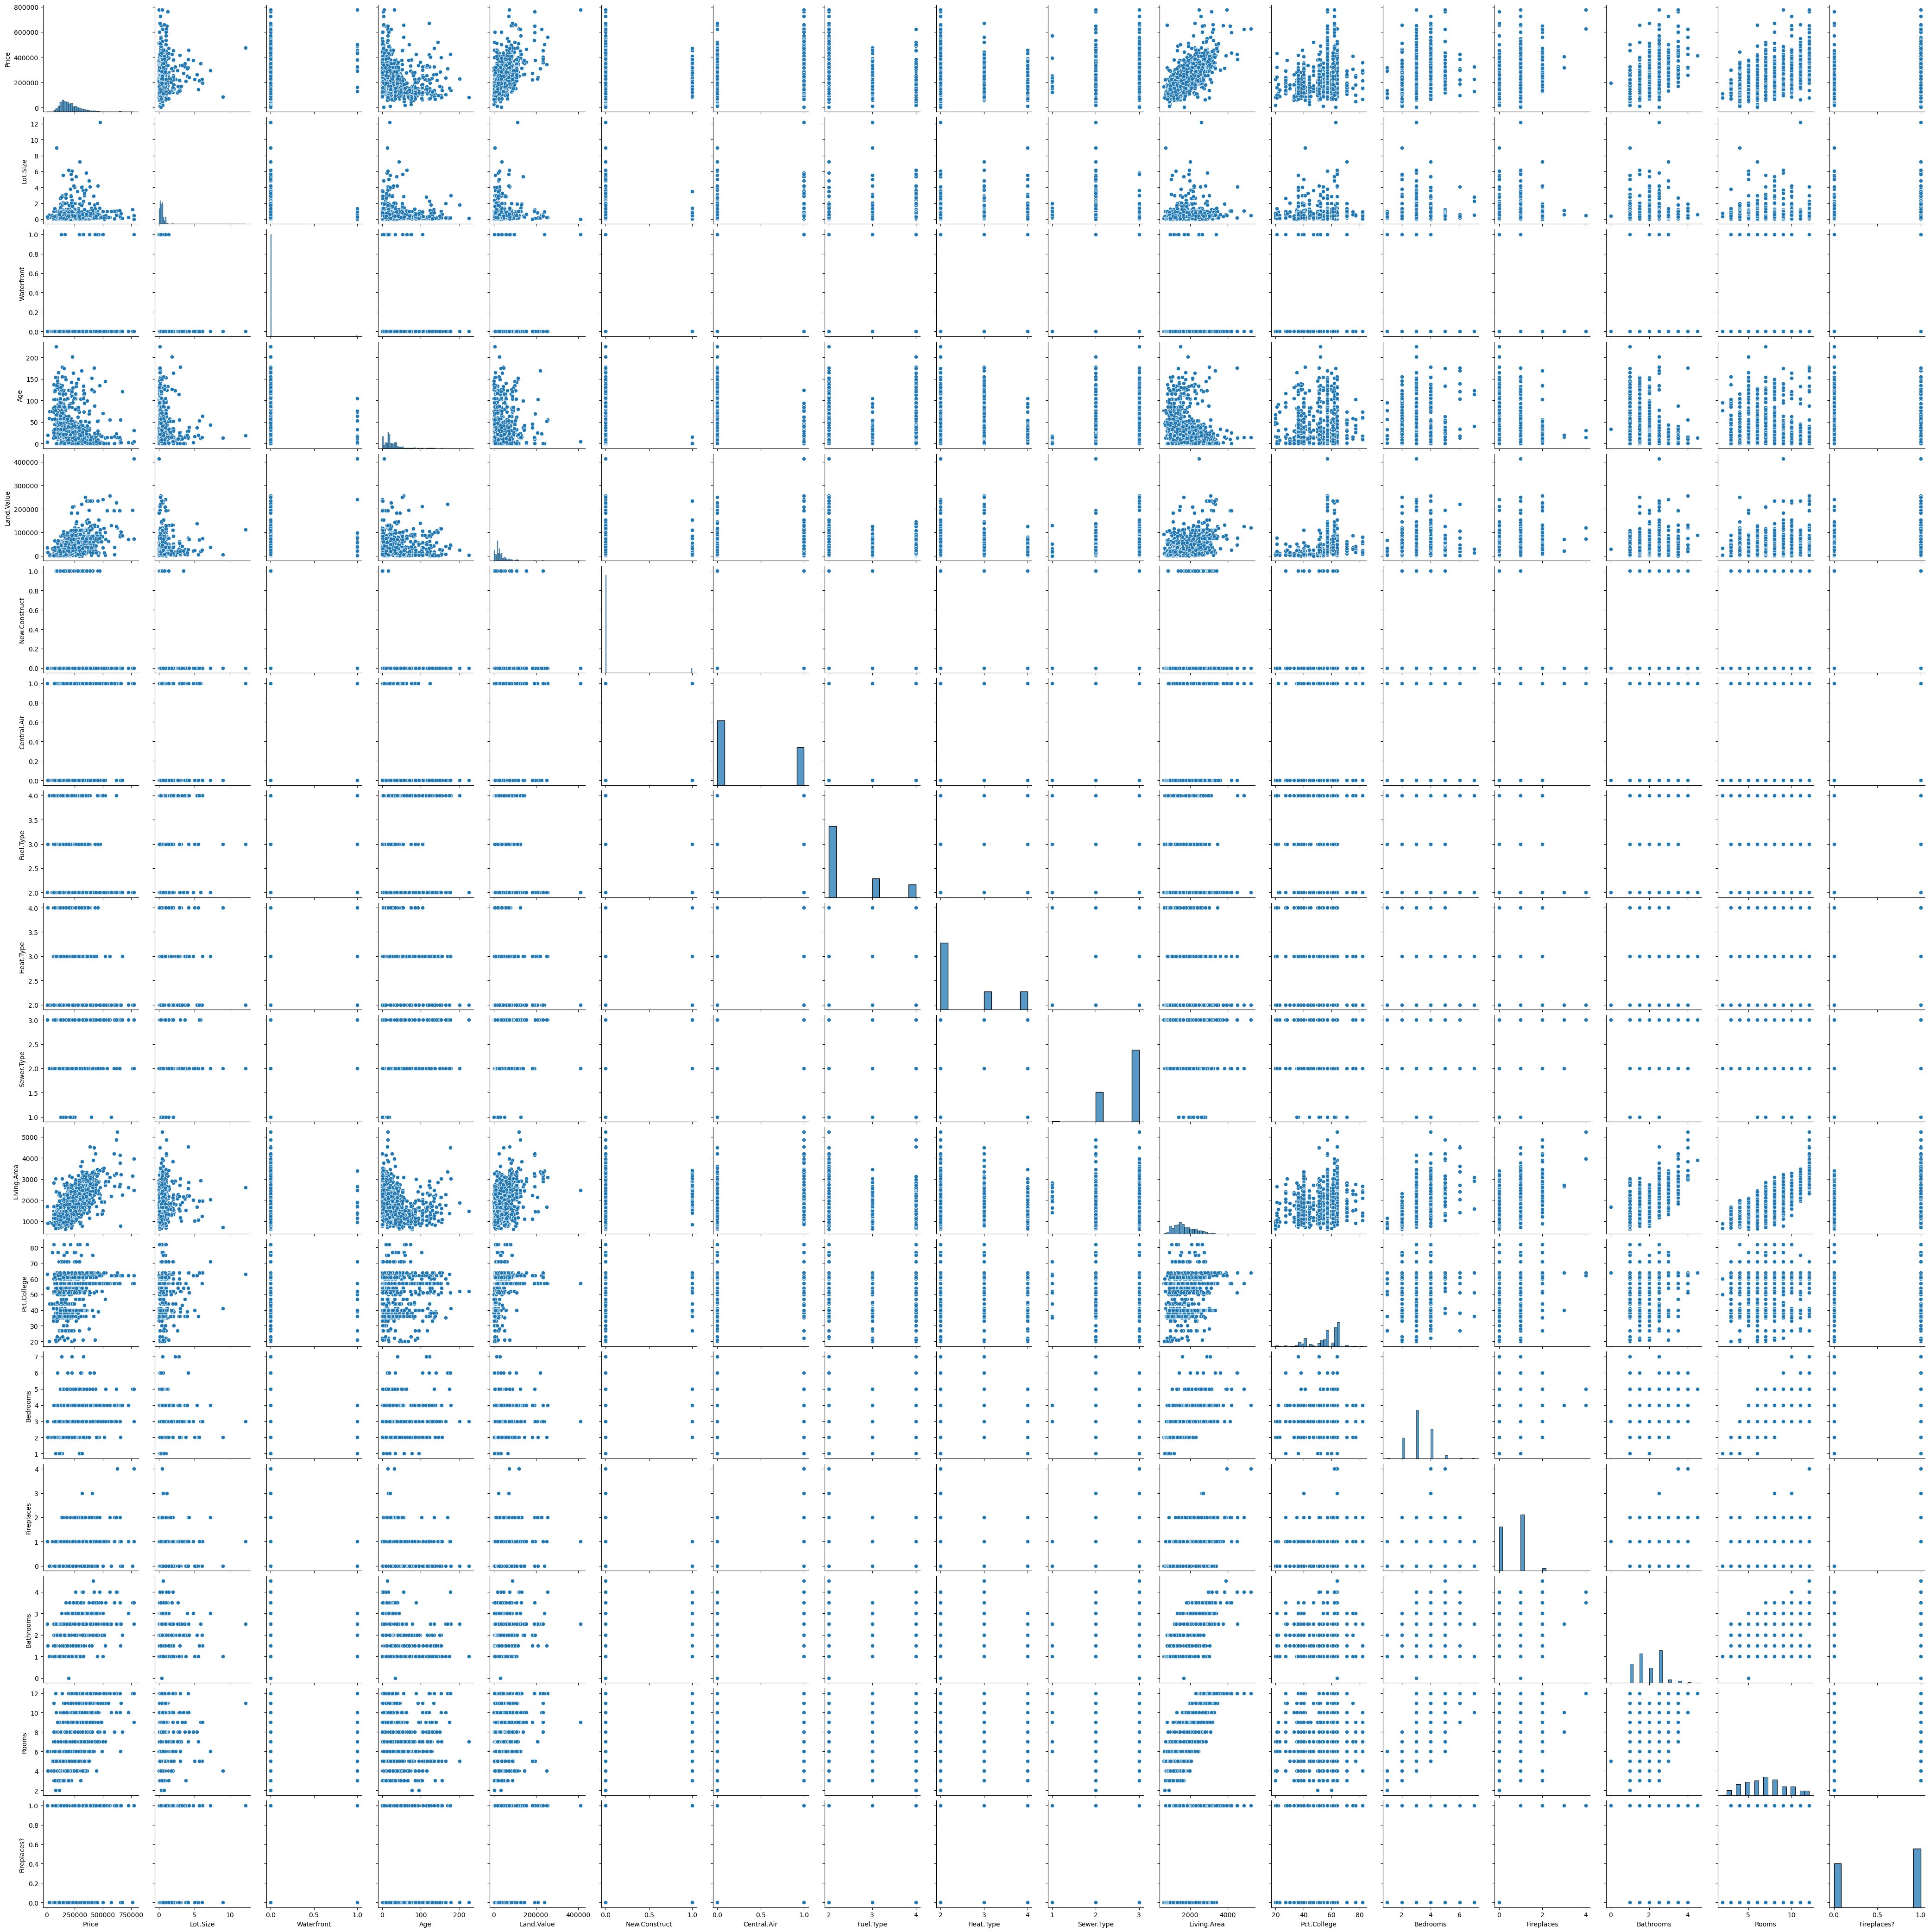

In [10]:
sns.pairplot(houses.to_pandas())

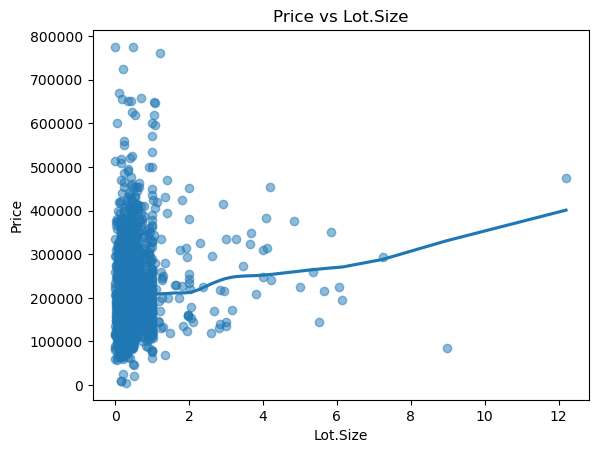

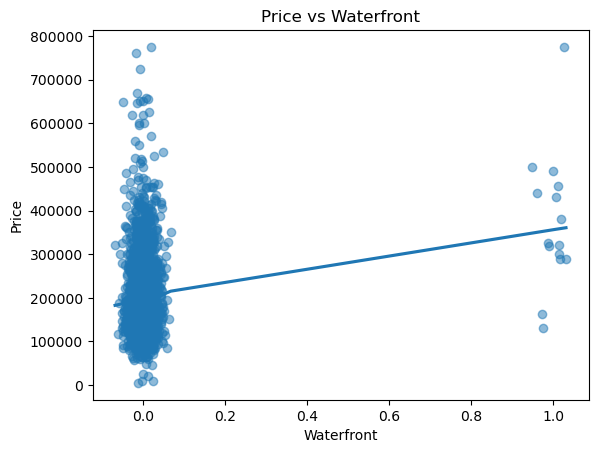

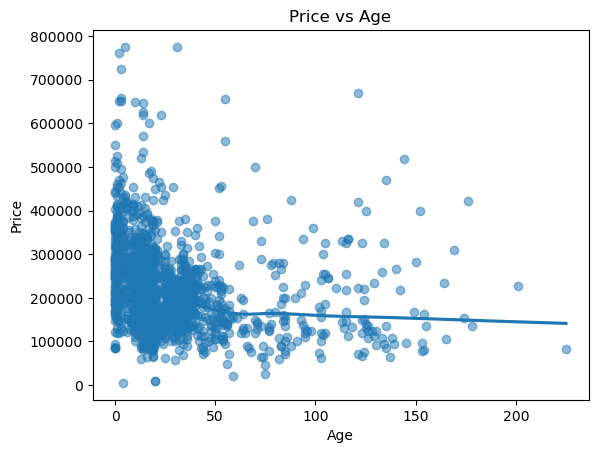

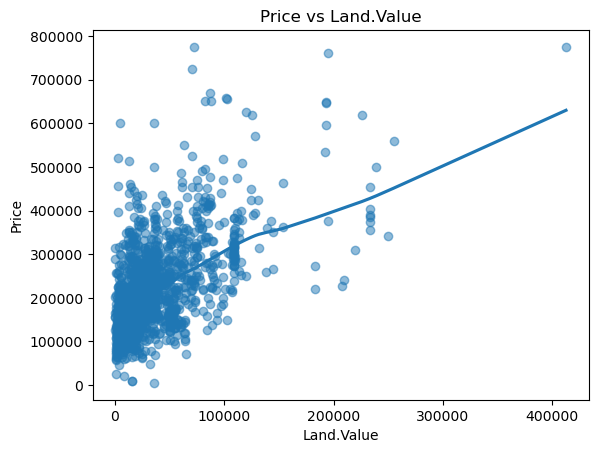

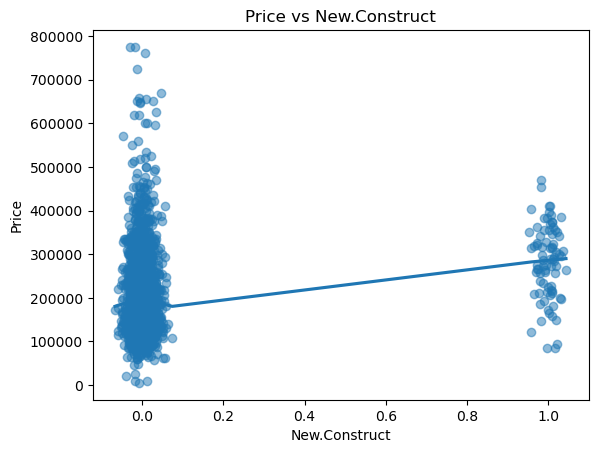

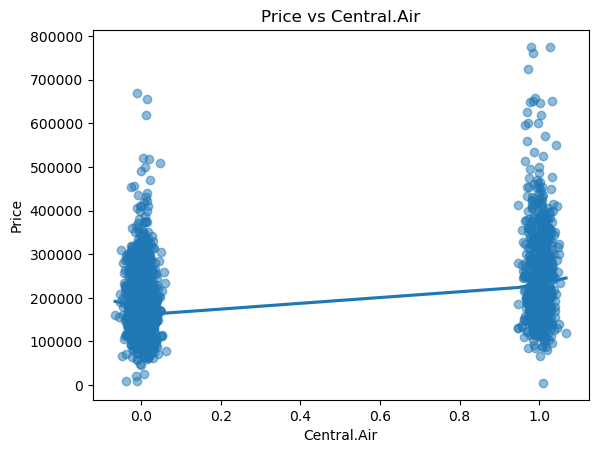

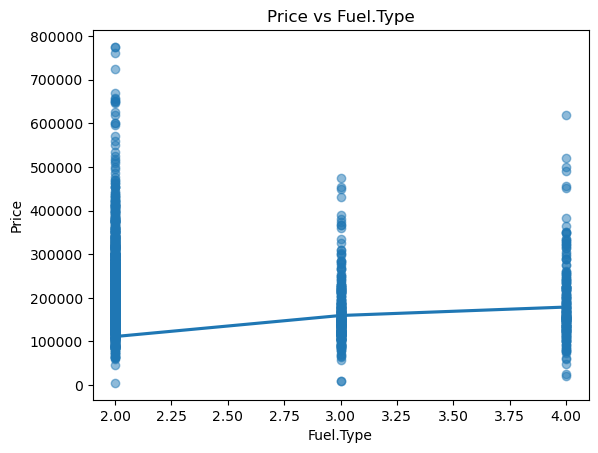

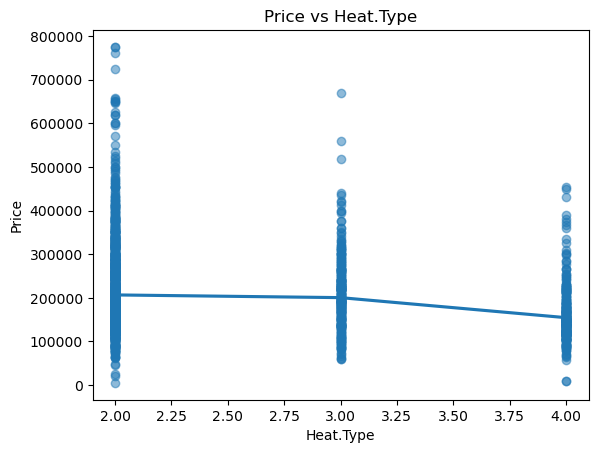

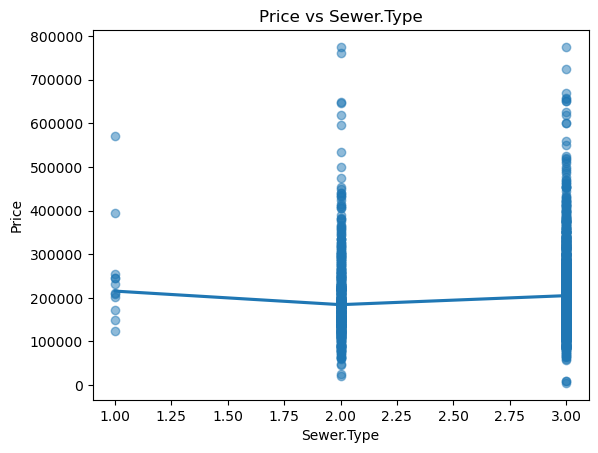

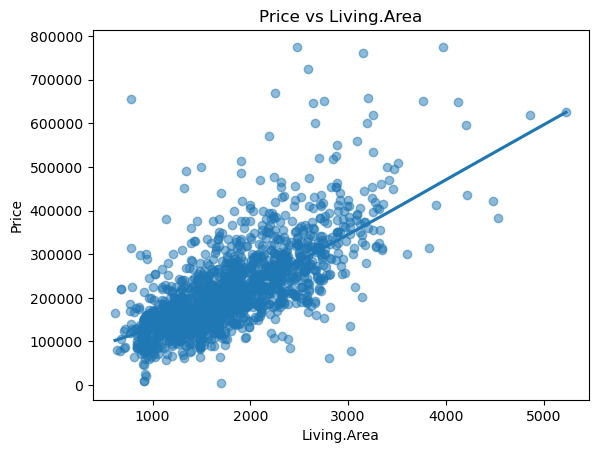

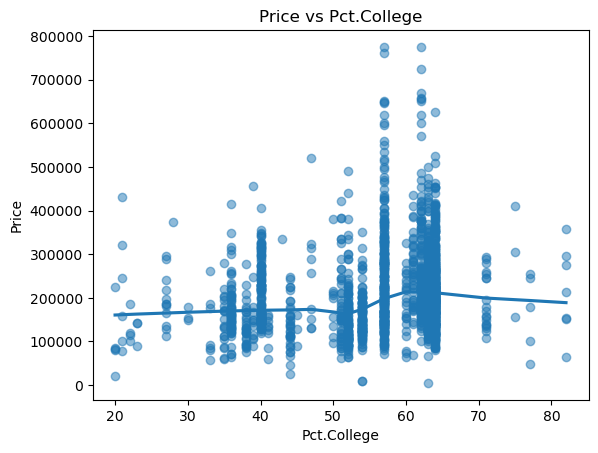

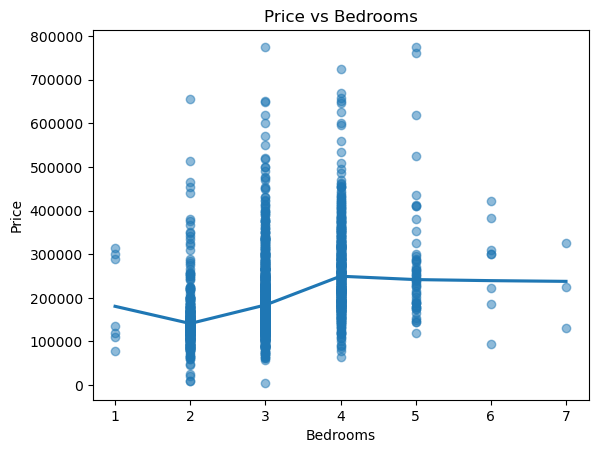

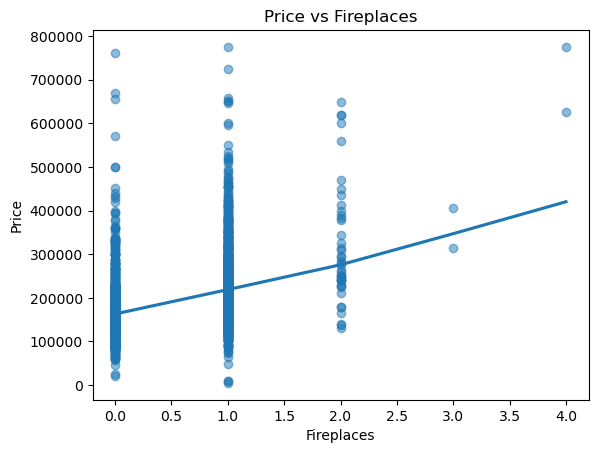

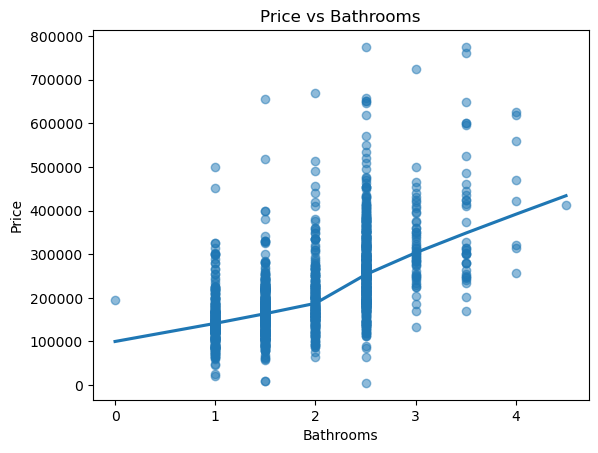

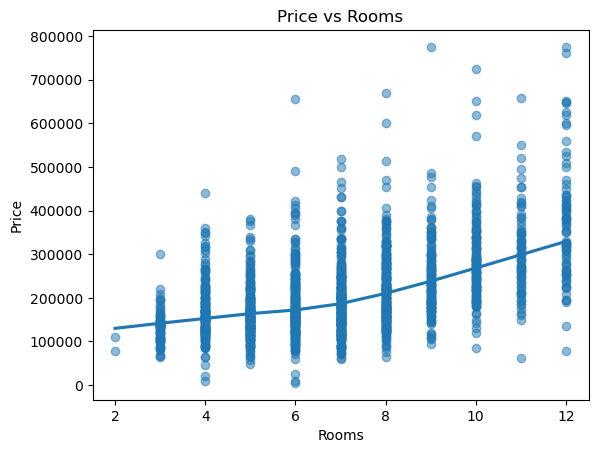

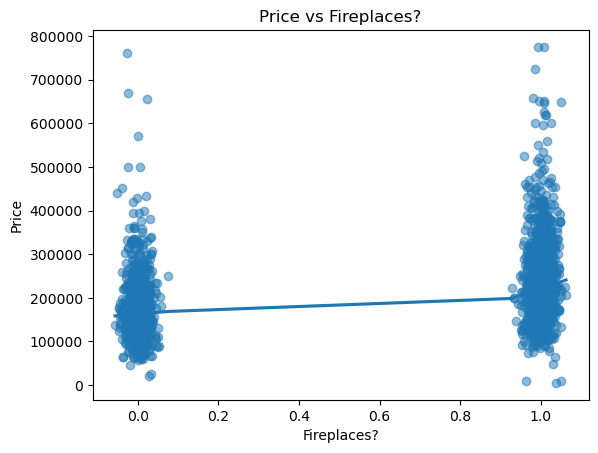

In [13]:
target = "Price"
predictors = [c for c in houses.columns if c != target]

for col in predictors:
    plt.figure()

    # Add jitter for binary variables
    x = houses[col]
    if x.n_unique() == 2:
        x = x.to_numpy() + np.random.normal(0, 0.02, size=len(x)) # Convert to numpy for arithmetic

    sns.regplot(
        x=x,
        y=houses[target],
        lowess=True,
        scatter_kws={"alpha": 0.5},
        line_kws={}
    )

    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

We have 3 different types of integer data:
Regular integers and floats
Binary data, where 0 = No and 1 = Yes
Specific type of data (ex: 0= honda, 1= toyota, 2 = chevy, etc)

**For the regular integers:**
Variables such as land value, living area, fireplaces, and bathrooms are relatively good indicators for the price of a house in this dataset. Other variables such as bedrooms, percent college, and age should not be considered good indictors for the price of a house.
**For binary data**
I would argue that the differences between ALL of the binary variables aren't substantial enough to confidently use them as indicators for price in the dataset.
**For 'types' of data**
Similar to the binary data, looking at the visuals I don't think there is enough variables between the types to use these as significant indicators for price.
